In [7]:
import gdown
import zipfile

In [8]:
url = "https://drive.google.com/file/d/1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE/view?usp=sharing"

file_id = url.split("/")[-2]
file_id

'1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE'

In [9]:
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix + file_id, 'garbage.zip')

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE&confirm=t&uuid=887bbfaf-8415-4055-8409-0a53acc89b0d
To: /kaggle/working/garbage.zip
100%|██████████| 133M/133M [00:00<00:00, 200MB/s] 


'garbage.zip'

In [10]:
zip_path = "/kaggle/working/garbage.zip"
extract_path = ""

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete!")

Extraction complete!


In [11]:
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [12]:
# gas_ranges = {
#     "battery" : {"CH4" : (1,3), "CO2": (550, 650), "CO": (1, 3) , "H2S":(0.02,0.05), "VOCs":(2, 6), "NH3":(0.001, 0.003), "Odor Intensity":(3,5)},
#     "biological" : {"CH4" : (200,350), "CO2": (1200, 1600), "CO": (15, 30) , "H2S":(0.4,0.7), "VOCs":(12, 20), "NH3":(0.2, 0.35), "Odor Intensity":(8,9)},
#     "brown-glass" : {"CH4" : 0, "CO2": (450, 550), "CO": 0 , "H2S": 0, "VOCs":0, "NH3":0, "Odor Intensity":0},
#     "cardboard" : {"CH4" : (2,4), "CO2": (500, 600), "CO": (2, 4) , "H2S":(0.002, 0.006), "VOCs":(0.5, 1), "NH3":(0.001, 0.003), "Odor Intensity":(2,3)},
#     "clothes" : {"CH4" : (5,8), "CO2": (600, 750), "CO": (5, 8) , "H2S":(0.01, 0.03), "VOCs":(3,7), "NH3":(0.005, 0.01), "Odor Intensity":(4,5)},
#     "green-glass" : {"CH4" : 0, "CO2": (450, 550), "CO": 0 , "H2S": 0, "VOCs":0, "NH3":0, "Odor Intensity":0},
#     "metal" : {"CH4" : 0, "CO2": (450, 550), "CO": 0 , "H2S": 0, "VOCs":0, "NH3":0, "Odor Intensity":0},
#     "paper" : {"CH4" : (1,3), "CO2": (500, 600), "CO": (1, 3) , "H2S":(0.001, 0.004), "VOCs":(0.3,0.7), "NH3":(0, 0.002), "Odor Intensity":(1,2)},
#     "plastic" : {"CH4" : (3,6), "CO2": (600, 800), "CO": (4, 7) , "H2S":(0.002, 0.006), "VOCs":(6,12), "NH3":(0.001, 0.003), "Odor Intensity":(3,4)},
#     "shoes" : {"CH4" : (5,8), "CO2": (600, 750), "CO": (5, 8) , "H2S":(0.01, 0.03), "VOCs":(3,7), "NH3":(0.005, 0.01), "Odor Intensity":(4,5)},
#     "trash" : {"CH4" : (10,20), "CO2": (700, 900), "CO": (8, 12) , "H2S":(0.05, 0.1), "VOCs":(4,8), "NH3":(0.01, 0.02), "Odor Intensity":(5,6)},
#     "white-glass" : {"CH4" : 0, "CO2": (450, 550), "CO": 0 , "H2S": 0, "VOCs":0, "NH3":0, "Odor Intensity":0}
    
# }

In [13]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

base_dir = "/kaggle/working/garbage"

def check_image_formats(base_dir, valid_exts):
    all_images_valid = True
    invalid_images = []

    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
        if not os.path.isdir(sub_dir_path):
            continue

        for file_name in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path, file_name)

            if os.path.isdir(file_path):
                continue

            file_ext = file_name.split('.')[-1].lower()
            if file_ext not in valid_exts:
                all_images_valid = False
                invalid_images.append(file_path)

    if all_images_valid:
        print("All images are in the specified formats.")
    else:
        print("The following images are not in the specified formats:")
        for img in invalid_images:
            print(img)

check_image_formats(base_dir, image_exts)


All images are in the specified formats.


In [14]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))

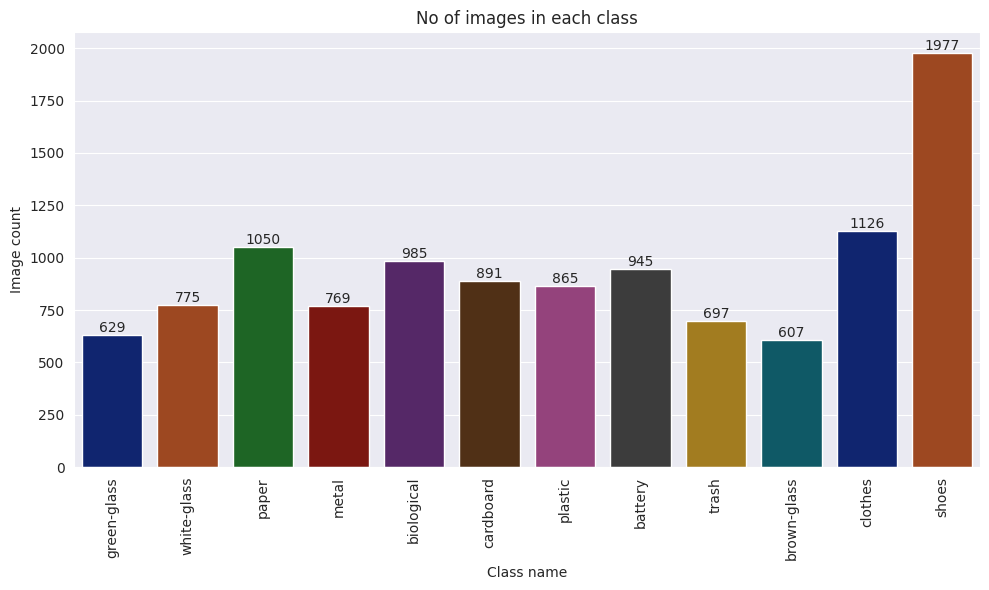

In [15]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## In above barplot we can clearly see data is imblanced

In [16]:
import os
import random

base_path = "/kaggle/working/garbage"

for sub_dir in os.listdir(base_path):
    sub_dir_path = os.path.join(base_path, sub_dir)
    images = os.listdir(sub_dir_path)
    total_images = len(images)

    if total_images > 700:
        images_to_delete = total_images - 700  

        for _ in range(images_to_delete):
            random_img = random.choice(images)
            delete_img = os.path.join(sub_dir_path, random_img)

            os.remove(delete_img)
            images.remove(random_img)  

        print(f"Deleted {images_to_delete} images in {sub_dir}")
    else:
        print(f"No deletion needed in {sub_dir}")


No deletion needed in green-glass
Deleted 75 images in white-glass
Deleted 350 images in paper
Deleted 69 images in metal
Deleted 285 images in biological
Deleted 191 images in cardboard
Deleted 165 images in plastic
Deleted 245 images in battery
No deletion needed in trash
No deletion needed in brown-glass
Deleted 426 images in clothes
Deleted 1277 images in shoes


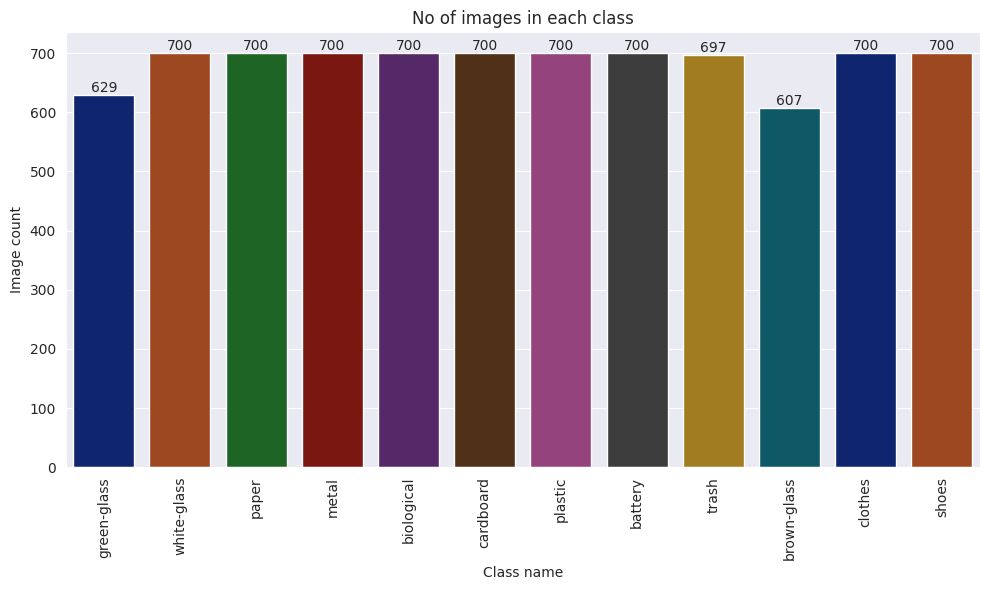

In [17]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))



plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
import random
import pandas as pd

garbage_classes = {
    "battery":       {"CH4": (1, 3), "CO2": (550, 650), "CO": (1, 3), "H2S": (0.02, 0.05), "VOCs": (2, 6), "NH3": (0.001, 0.003), "Odor": (3, 5)},
    "biological":    {"CH4": (200, 350), "CO2": (1200, 1600), "CO": (15, 30), "H2S": (0.4, 0.7), "VOCs": (12, 20), "NH3": (0.2, 0.35), "Odor": (8, 9)},
    "brown-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "cardboard":     {"CH4": (2, 4), "CO2": (500, 600), "CO": (2, 4), "H2S": (0.002, 0.006), "VOCs": (0.5, 1), "NH3": (0.001, 0.003), "Odor": (2, 3)},
    "clothes":       {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "green-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "metal":         {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "paper":         {"CH4": (1, 3), "CO2": (500, 600), "CO": (1, 3), "H2S": (0.001, 0.004), "VOCs": (0.3, 0.7), "NH3": (0, 0.002), "Odor": (1, 2)},
    "plastic":       {"CH4": (3, 6), "CO2": (600, 800), "CO": (4, 7), "H2S": (0.002, 0.006), "VOCs": (6, 12), "NH3": (0.001, 0.003), "Odor": (3, 4)},
    "shoes":         {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "trash":         {"CH4": (10, 20), "CO2": (700, 900), "CO": (8, 12), "H2S": (0.05, 0.1), "VOCs": (4, 8), "NH3": (0.01, 0.02), "Odor": (5, 6)},
    "white-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
}

dataset_path = "/kaggle/working/garbage"

data = []

for category, ranges in garbage_classes.items():
    category_path = os.path.join(dataset_path, category)
    
    if os.path.exists(category_path):
        for img_file in os.listdir(category_path):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):  
                img_path = os.path.join(category_path, img_file)
                
                sensor_values = {gas: round(random.uniform(*range_val), 3) for gas, range_val in ranges.items()}
                
                data.append({"image_path": img_path, "label": category, **sensor_values})

df = pd.DataFrame(data)

df.to_csv("garbage_sensor_data.csv", index=False)


In [19]:
path = "/kaggle/working/garbage_sensor_data.csv"
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,image_path,label,CH4,CO2,CO,H2S,VOCs,NH3,Odor
0,/kaggle/working/garbage/battery/battery931.jpg,battery,1.927,599.982,1.671,0.027,2.556,0.002,4.325
1,/kaggle/working/garbage/battery/battery637.jpg,battery,2.223,603.411,1.181,0.031,2.747,0.003,4.996
2,/kaggle/working/garbage/battery/battery301.jpg,battery,1.762,609.837,2.451,0.041,4.091,0.002,4.828
3,/kaggle/working/garbage/battery/battery597.jpg,battery,2.425,575.352,2.753,0.047,3.851,0.002,3.413
4,/kaggle/working/garbage/battery/battery811.jpg,battery,1.100,602.444,2.120,0.032,4.082,0.003,4.664
...,...,...,...,...,...,...,...,...,...
8228,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,479.784,0.000,0.000,0.000,0.000,0.000
8229,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,461.561,0.000,0.000,0.000,0.000,0.000
8230,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,541.402,0.000,0.000,0.000,0.000,0.000
8231,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,534.821,0.000,0.000,0.000,0.000,0.000


In [20]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(data,test_size=0.2,random_state=42,stratify=data['label'])


print(f"Number of images in the training set: {len(train_df)}")
print(f"Number of images in the validation set: {len(val_df)}")

Number of images in the training set: 6586
Number of images in the validation set: 1647


In [21]:
overall_distribution = data['label'].value_counts(normalize=True) * 100

train_distribution = train_df['label'].value_counts(normalize=True) * 100

val_distribution = val_df['label'].value_counts(normalize=True) * 100


print("Class distribution in the entire dataset:\n")
print(overall_distribution.round(2))
print('-'*40)

print("\nClass distribution in the training set:\n")
print(train_distribution.round(2))
print('-'*40)

print("\nClass distribution in the validation set:\n")
print(val_distribution.round(2))

Class distribution in the entire dataset:

label
battery        8.50
biological     8.50
cardboard      8.50
clothes        8.50
white-glass    8.50
metal          8.50
paper          8.50
plastic        8.50
shoes          8.50
trash          8.47
green-glass    7.64
brown-glass    7.37
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the training set:

label
metal          8.50
white-glass    8.50
cardboard      8.50
clothes        8.50
shoes          8.50
biological     8.50
plastic        8.50
paper          8.50
battery        8.50
trash          8.46
green-glass    7.64
brown-glass    7.38
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the validation set:

label
battery        8.50
white-glass    8.50
plastic        8.50
paper          8.50
clothes        8.50
metal          8.50
cardboard      8.50
shoes          8.50
trash          8.50
biological     8.50
green-glass    7.65
brown

In [22]:
data

,image_path,label,CH4,CO2,CO,H2S,VOCs,NH3,Odor
0,/kaggle/working/garbage/battery/battery931.jpg,battery,1.927,599.982,1.671,0.027,2.556,0.002,4.325
1,/kaggle/working/garbage/battery/battery637.jpg,battery,2.223,603.411,1.181,0.031,2.747,0.003,4.996
2,/kaggle/working/garbage/battery/battery301.jpg,battery,1.762,609.837,2.451,0.041,4.091,0.002,4.828
3,/kaggle/working/garbage/battery/battery597.jpg,battery,2.425,575.352,2.753,0.047,3.851,0.002,3.413
4,/kaggle/working/garbage/battery/battery811.jpg,battery,1.100,602.444,2.120,0.032,4.082,0.003,4.664
...,...,...,...,...,...,...,...,...,...
8228,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,479.784,0.000,0.000,0.000,0.000,0.000
8229,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,461.561,0.000,0.000,0.000,0.000,0.000
8230,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,541.402,0.000,0.000,0.000,0.000,0.000
8231,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,534.821,0.000,0.000,0.000,0.000,0.000


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
data[['CH4','CO2','CO','H2S','VOCs','NH3','Odor']] = scaling.fit_transform(data[['CH4','CO2','CO','H2S','VOCs','NH3','Odor']])

In [24]:
train_df = data.sample(frac=1,random_state=0).iloc[:6000]
val_df = data.sample(frac=1,random_state=0).iloc[6000:7500]
test_df = data.sample(frac=1,random_state=0).iloc[7500:]

print("training data: ", train_df.shape)
print("validation data: ", val_df.shape)
print("testing data: ", test_df.shape)

training data:  (6000, 9)
validation data:  (1500, 9)
testing data:  (733, 9)


In [25]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    rotation_range=30,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True
#                                   )
# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
# train_generator = train_datagen.flow_from_dataframe(train_df,
#                                                    directory = '/kaggle/working/garbage',
#                                                    x_col = 'image_path',
#                                                    y_col = 'label',
#                                                     target_size=(224,224),
#                                                     class_mode="categorical"
#                                                    )

# val_generator = val_datagen.flow_from_dataframe(val_df,
#                                                    directory = '/kaggle/working/garbage',
#                                                    x_col = 'image_path',
#                                                    y_col = 'label',
#                                                     target_size=(224,224),
#                                                     class_mode="categorical"
#                                                    )



# test_generator = test_datagen.flow_from_dataframe(test_df,
#                                                    directory = '/kaggle/working/garbage',
#                                                    x_col = 'image_path',
#                                                    y_col = 'label',
#                                                     target_size=(224,224),
#                                                     class_mode="categorical"
#                                                    )



Found 6000 validated image filenames belonging to 12 classes.
Found 1500 validated image filenames belonging to 12 classes.
Found 733 validated image filenames belonging to 12 classes.


In [44]:
import numpy as np
import cv2
import pandas as pd
import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.models import Model


class MultiModalDataGenerator(Sequence):
    def __init__(self, df, batch_size=32, img_size=(224,224), shuffle=True, augmentor=None):
        self.df = df
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.augmentor = augmentor
        self.indices = np.arange(len(df))
        self.on_epoch_end()
    
    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))
    
    def __getitem__(self, index):
        batch_indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_df = self.df.iloc[batch_indices]
        return self.__data_generation(batch_df)
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)
            
    def __data_generation(self, batch_df):
        batch_size = len(batch_df)
        image_batch = np.zeros((batch_size, *self.img_size, 3), dtype=np.float32)
        gas_batch = np.zeros((batch_size, 7), dtype=np.float32) 
        
        label_mapping = {
            "battery": 0,
            "biological": 1,
            "brown-glass": 2,
            "cardboard": 3,
            "clothes": 4,
            "green-glass": 5,
            "metal": 6,
            "paper": 7,
            "plastic": 8,
            "shoes": 9,
            "trash": 10,
            "white-glass": 11
        }
        num_classes = len(label_mapping)
        labels = np.zeros((batch_size, num_classes), dtype=np.float32)
        
        for i, row in enumerate(batch_df.itertuples()):
            img = cv2.imread(row.image_path)
            if img is None:
                print("Error reading image:", row.image_path)
                continue
            img = cv2.resize(img, self.img_size)
            img = img.astype(np.float32) / 255.0  
            if self.augmentor is not None:
                img = self.augmentor.random_transform(img)
            image_batch[i] = img
            
            gas_values = [row.CH4, row.CO2, row.CO, row.H2S, row.VOCs, row.NH3, row.Odor]
            gas_batch[i] = np.array(gas_values, dtype=np.float32)
            
            label_idx = label_mapping.get(row.label)
            if label_idx is not None:
                labels[i, label_idx] = 1
        
        return ((image_batch, gas_batch), labels)
        

augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = MultiModalDataGenerator(train_df, batch_size=32, img_size=(224,224), shuffle=True, augmentor=augmentor)
val_generator   = MultiModalDataGenerator(val_df, batch_size=32, img_size=(224,224), shuffle=False, augmentor=None)
test_generator  = MultiModalDataGenerator(test_df, batch_size=32, img_size=(224,224), shuffle=False, augmentor=None)



image_input = Input(shape=(224,224,3), name='image_input')
# Xception
xception = InceptionResNetV2(include_top=False, input_tensor=image_input)
xception.trainable = False  
x = xception.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

gas_input = Input(shape=(7,), name='gas_input')
y = Dense(32, activation='relu')(gas_input)
y = BatchNormalization()(y)
y = Dense(64, activation='relu')(y)
y = BatchNormalization()(y)

combined = Concatenate()([x, y])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)
output = Dense(12, activation='softmax', name='output')(z)  

model = Model(inputs=[image_input, gas_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 99s 384ms/step - accuracy: 0.2848 - loss: 8.5509 - val_accuracy: 0.6807 - val_loss: 1.4845
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 66s 341ms/step - accuracy: 0.7072 - loss: 0.7127 - val_accuracy: 0.7928 - val_loss: 0.8083
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 66s 339ms/step - accuracy: 0.7213 - loss: 0.6249 - val_accuracy: 0.7826 - val_loss: 0.4941
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 65s 337ms/step - accuracy: 0.7447 - loss: 0.5530 - val_accuracy: 0.8207 - val_loss: 0.4259
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 65s 338ms/step - accuracy: 0.7388 - loss: 0.5672 - val_accuracy: 0.8125 - val_loss: 0.3880
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 66s 340ms/step - accuracy: 0.7285 - loss: 0.5557 - val_accuracy: 0.8560 - val_loss: 0.3934
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 65s 336ms/step - accuracy: 0.7579 - loss: 0.5004 - val_accuracy: 0.8431 - val_loss: 0.3659
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 65s 337ms/step - accuracy: 0.7581 - loss: 0

In [31]:
import kerastuner as kt
def build_model(hp):

    image_input = Input(shape=(224,224,3), name='image_input')

    xception = Xception(include_top=False, input_tensor=image_input)
    xception.trainable = False  
    x = xception.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    gas_input = Input(shape=(7,), name='gas_input')
    y = Dense(32, activation='relu')(gas_input)
    y = BatchNormalization()(y)
    y = Dense(64, activation='relu')(y)
    y = BatchNormalization()(y)
    
    combined = Concatenate()([x, y])
    z = Dense(128, activation='relu')(combined)
    z = Dropout(0.5)(z)
    output = Dense(12, activation='softmax', name='output')(z)  
    
    model = Model(inputs=[image_input, gas_input], outputs=output)

    
    optimizer = hp.Choice('optimizer',values=['Adam','SGD','RMSprop','Adadelta','Adagrad'])
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model
        

In [32]:
tuner = kt.RandomSearch(build_model, objective='loss',max_trials=5)
tuner.search(train_generator,epochs=5,validation_data=val_generator)

Trial 5 Complete [00h 05m 42s]
loss: 0.47421473264694214

Best loss So Far: 0.3177529573440552
Total elapsed time: 00h 28m 21s


In [34]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'SGD'}

In [ ]:
# InceptionResNetV2	
# ResNet152V2
# EfficientNetB7
# EfficientNetV2L

# Adadelta
# SGD